<span style="font-size: 120%">Analyze the difference/similarity between user's resume 
and the clusters created in previous notebook<br> <i>3_clustering.ipynb</i>.
Allowing one to concieve of improvements to their marketable skill set or credentials.</span>


In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition           import TruncatedSVD
from sklearn.metrics.pairwise        import cosine_similarity 

%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy  as np

import json
import pickle
import random


In [2]:
k = None
with open('config.json') as f:
    k = json.load(f)['k_hyperparam']
k

5

In [3]:
# manually enter bullet points on user's resume 
resume_bullets = """
C/C++, Python, SQL, Regex
Bash shell, Git and its hosting services, Visual Studio, Catch2 testing framework, Jupyter Notebook,
Ubuntu/Linux, Windows, 
Test-Driven Development and Unit Testing, Unsupervised Learning
Applied Mathematics, introductory courses in linear algebra, calculus, and statistics
computer science electives, including first course in data structures & algorithms"""

# combine cluster data with assigned cluster

job_reqs = None
with open('data/job_reqs_list.pkl', 'rb') as f:
    job_reqs = pickle.load(f)

# rtc: requirements-to-cluster
rtc_df = pd.read_pickle('data/clust_labels_df.pkl', 'zip')
rtc_df.insert(0, 'li_elems', job_reqs)
print(rtc_df.shape)
print(rtc_df.head())


(1465, 2)
                                            li_elems  cluster
0  Take high-level project requirements and formu...        1
1  Take business requirements from the various pr...        1
2  Meet with decision makers, systems owners, and...        1
3  Design and implement methods for the ongoing m...        1
4  Report on prediction accuracy, model stability...        1


In [4]:
# compute and store cosine similarities between user resume's skills
# and the job requirement clusters for visualization

res_clust_sim = {}
clustered_bullets = {}

for i in range(1, k+1):
    clustered_bullets[i] = rtc_df[rtc_df['cluster'] == i]['li_elems']
    clust = ' '.join(
        (b for b in clustered_bullets[i]))
    
    vocab = TfidfVectorizer(stop_words='english')
    vocab.fit((resume_bullets, clust))
    
    resume_vec = vocab.transform((resume_bullets,))
    clust_vec = vocab.transform((clust,))

    cs = cosine_similarity(resume_vec, clust_vec)
    res_clust_sim[i] = cs[0][0]

res_clust_sim

{1: 0.07208316150214739,
 2: 0.14326870164030406,
 3: 0.14334650729708268,
 4: 0.11864118732333861,
 5: 0.14885313027189792}

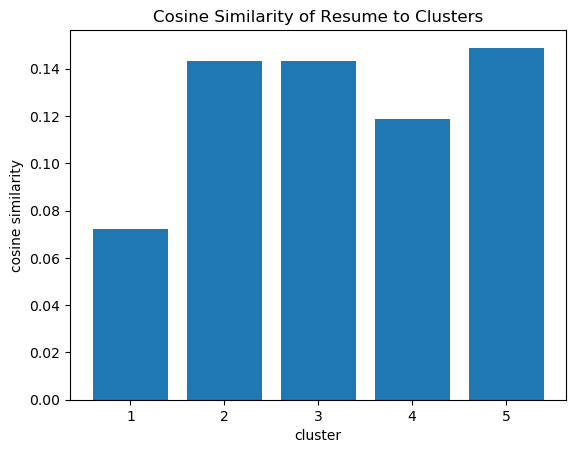

In [5]:
res_clust_sim = dict(sorted(
    res_clust_sim.items(), 
    key=lambda item: item[1],
    reverse=True))

plt.title('Cosine Similarity of Resume to Clusters')
plt.xlabel('cluster')
plt.ylabel('cosine similarity')
plt.bar(x=res_clust_sim.keys(), height=res_clust_sim.values());

<span style="font-size: 110%"> Besides having higher scores for each cluster, 
are there optimal outcomes with respect to peak vs uniformity<br> of the resume-to-cluster 
similarities in this situation?</span>

<span style="font-size: 110%">Here are some suggestions from:</span>
 - <span style="font-size: 110%">thinking of what it means quantitatively</span>
 - <span style="font-size: 110%">incorporating knowledge of: NLP, modern-hiring processes,
   technologies used by employers, the compete-<br>ncies expected of people who work with data, 
   and the data science profession</span>
 
#### **Quantitatively**

<span style="font-size: 110%">Since similarity (cosine) is determined by
the angles between vectors and is negatively sloped; increasing<br> the resume's
similarity to a cluster(s) can have the effect of decreasing it to other clusters(s),
that is, a tradeoff<br> has to be made in that vector space. However in a different
scenario increasing the similarity to one cluster<br> could increase the similarities to 
some or all the clusters.</span>

<span style="font-size: 110%">This is easily understood with 3, 2D document vectors,
with 2 equal angles between them. Let the vector<br> in the middle be the resume document,
hence decreasing the angle by rotating the middle vector closer to<br> one of the other two
necessarily increases the angle between the middle vector and the vector which it's<br> now
further away from (euclidean distance): the similarity to one cluster increases at the
expense of the other.</span>

<span style="font-size: 110%">Likewise for the above example, if one of the outermost 
vectors is the resume document, decreasing the<br> angle to the middle vector would do 
the same for the other and hence increase the similarity for both of them.</span>

<span style="font-size: 110%">This simple 2D example can be extended by adding vectors
to select directions and checking the effects of<br> trying to increase similarities under
a different setup, not just to a local similarity (a cluster) but regional/global<br> similarities
(more than one cluster).</span>
 
<span style="font-size: 110%">So depending on combinations of cardinalities and 
orientations of the cluster vectors with respect to the<br> resume vector, and the goals
of the job seeker: one can go about trying to maximize their similarity<br> to one/group/all
of the clusters, like a least squares algorithm would.</span>

<span style="font-size: 110%">However the above statements to not take into consideration the
the clusters' cardinality differences, which<br> adds another level of complexity. That is, trying
to add weights to clusters based off of how many data points<br> got assigned to them.</span>

#### **Qualitatively**

<span style="font-size: 110%">It's known that employers are using algorithms/models
to assist filtering the vast resumes they receive for<br> a single position. So it's not
a bad idea to craft resumes with this in mind. However I perceive there is a point<br> of 
diminishing returns trying to minimize differences to a group of job descriptions.</span> 

<span style="font-size: 110%">This is attributed to several unknowns and their changing
nature (regarding the filter(s) being used) in any one<br> employer's hiring process,
the limits of NLP as a useful tool, and the ability to properly sample this type of data.</span>

<span style="font-size: 110%">The word clouds in the <i>3_clustering.ipynb</i> notebook
showed things that I would expect to see from my time spent<br> in the world of 
data science/analytics.</span>

<span style="font-size: 110%">My intuition is that applicant tracking systems, HR people,
and hiring managers will be looking for things that<br> were not explicitly written 
in the job description. So at least having basic experience/knowledge of these words<br>
(or n-grams), and including them on a resume, if only once, could facilitate passing a 
boolean style check from<br> a computer/human.</span>
 
#### **In Conclusion**
 
<span style="font-size: 110%">Incorporating key terms/n-grams from the clusters to a job seeker's 
experiences and priorititizing them based<br> off a given clusters cardinality appears to be a 
sensible rule-of-thumb strategy; provided that one is aware of<br> the asymmetry towards clusters 
that contain generic soft skills as their top scoring n-grams (so devalue this<br> rule-of-thumb 
based off of that).

<span style="font-size: 110%">This way, skill sets, credentials, and resumes can be prioritized
more to a given cluster(s) (related to job types<br> within data science) that represent a higher 
proportion of posted job requirements or those which are more<br> desirable to a given individual.
While at the same time maintaining a baseline of similarity to other clusters so<br> that a resume 
is not disqualified by those who consider it too narrow.</span>


In [6]:
# examine top words and sample job requirements from each cluster 

cw_file = open('data/clust_words.pkl', 'rb')
clust_words = pickle.load(cw_file)
cw_file.close()
random.seed(0)

for i in range(1, k+1):
    fetch_num = 7
    print("The top {} words in cluster {} are: {}".format(
        fetch_num, i, ', '.join(clust_words[i][:fetch_num])), end='\n\n')
    
    print("some sample job requirements or desired items:", end='\n\n')
    for j in range(5):
        print(f"- {random.choice(tuple(clustered_bullets[i]))} \n")
    print('\n')


The top 7 words in cluster 1 are: experience, business, skills, work, ability, environment, excellent

some sample job requirements or desired items:

- Plan and manage engagement objectives and key deliverables using analytics processes to mitigate risks in data, modeling, validation and delivery 

- Ability to travel up to eighty percent of the time; Applicants must be currently authorized to work in the United States without the need for visa sponsorship now or in the future 

- Ability to translate very complex subject matter into understandable written and oral communications. 

- Coordinate activities with Aegon Global Analytics partners for knowledge sharing and process alignment. 

- Provide significant direction for strategic plans and product roadmaps 



The top 7 words in cluster 2 are: learning, machine, experience, processing, algorithms, statistical, data

some sample job requirements or desired items:

- Strong professional experience in feature engineering, feature sel